In [1]:
import uproot as up
import awkward as ak
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import vector
vector.register_awkward()

In [2]:
Z_files = ["/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/938e1e79-b0f4-495d-8780-c51c0e7a4e90.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/a2258a20-3655-482e-acb4-a3a1f91e12f3.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/e9abc972-3e00-4dda-8d76-6b5cfc7544b9.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/338c2f58-e1bb-4904-a342-3766a8a3a69a.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/16a439d3-a9c4-4171-87d9-0fd9a4306ae5.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/16d14f22-fd03-4fc2-96d6-8cc611fca442.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/da5a203d-1a51-42ee-b4f3-24ff604ee456.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/c10e6202-8e79-4ca1-ae32-efa204947a78.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/12cfeaea-cc85-4dcd-91f8-53679a276e42.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/400to600/2064fbd5-00fd-4935-ab60-e4de81f619bf.root", ]
        
branches_to_select = ["Jet_pt", "Jet_eta", "Jet_phi","Jet_mass", "Jet_jetId", "Jet_btagDeepFlavB", "MET_pt", "MET_phi"]

Z_arrays = [up.open(f)["Events"].arrays(branches_to_select) for f in Z_files]

all_Z = ak.concatenate(Z_arrays)

In [3]:
all_Z

<Array [{Jet_pt: [...], ...}, ..., {...}] type='247895 * {Jet_pt: var * flo...'>

In [4]:
z = ak.zip({"pt":all_Z.Jet_pt, "eta":all_Z.Jet_eta, "phi":all_Z.Jet_phi, "mass":all_Z.Jet_mass, "id1":all_Z.Jet_jetId, "id2":all_Z.Jet_btagDeepFlavB, "met_pt":all_Z.MET_pt,"met_phi":all_Z.MET_phi },  with_name = "Momentum4D")
z

<MomentumArray4D [[{pt: 395, eta: -1.44, ...}, ...], ...] type='247895 * va...'>

In [5]:
selected_event_z = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5)]
selected_event_z = selected_event_z[ak.num(selected_event_z)>0]
selected_event_z

<MomentumArray4D [[{pt: 574, eta: -0.754, ...}], ...] type='671 * var * Mom...'>

In [6]:
selected_event_z_b = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5) & (z.id2 > 0.3086)]
selected_event_z_b = selected_event_z_b[ak.num(selected_event_z_b)>0]
selected_event_z_b

<MomentumArray4D [[{pt: 478, eta: 1.14, ...}], ...] type='117 * var * Momen...'>

In [24]:
lumi = 8
sigma = 202.7
ni = 247895 
nf1 = 117
f1 = lumi*sigma*nf1/ni
weights1 = (np.ones_like(ak.flatten(selected_event_z_b.pt)))*f1

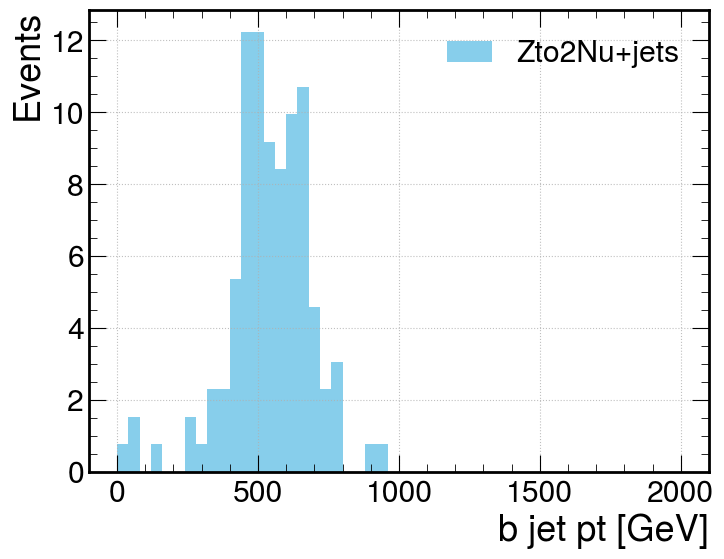

In [25]:
plt.figure(figsize=(8,6))
counts1, bin_edges1, _ = plt.hist(ak.flatten(selected_event_z_b.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue', weights = weights1)
# Labels and legend
plt.xlabel("b jet pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('bjet pt',bbox_inches='tight')
plt.show()



In [26]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("bjet_pt_4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("b_jet_pt_hist1", "bjet pt", len(bin_edges1)-1, bin_edges1)

# Fill the ROOT histogram with the counts
for i in range(len(counts1)):
    hist1.SetBinContent(i+1, counts1[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

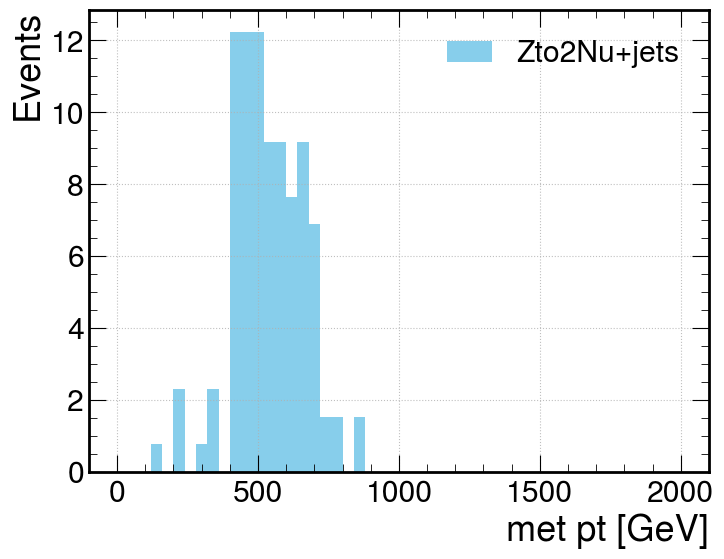

In [27]:
plt.figure(figsize=(8,6))
counts2, bin_edges2,_ = plt.hist(ak.flatten(selected_event_z_b.met_pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights1)
# Labels and legend
plt.xlabel("met pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('met pt',bbox_inches='tight')
plt.show()

In [28]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("met_4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "MET pt", len(bin_edges2)-1, bin_edges2)

# Fill the ROOT histogram with the counts
for i in range(len(counts2)):
    hist1.SetBinContent(i+1, counts2[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

In [29]:
z = z[(ak.num(z) >=2)]

sorted_z = z[ak.argsort(z.pt, axis=1, ascending=False)]

# Step 4: Extract leading and subleading
leading_z = sorted_z[:, 0]
subleading_z = sorted_z[:, 1]

# Step 5: Compute invariant mass of dijet system
dijet_mass_z = (leading_z + subleading_z).mass
dijet_pt_z = (leading_z + subleading_z).pt

In [30]:
z

<MomentumArray4D [[{pt: 395, eta: -1.44, ...}, ...], ...] type='178190 * va...'>

In [31]:
print(dijet_mass_z)        
print(leading_z.pt)        
print(subleading_z.pt)    
print(len(dijet_mass_z))
print(dijet_pt_z)
print(len(dijet_mass_z))

[410, 185, 954, 510, 211, 1.22e+03, 1.08e+03, ..., 114, 413, 359, 714, 263, 849]
[395, 433, 457, 445, 441, 507, 570, 398, ..., 574, 520, 594, 450, 418, 364, 474]
[26.6, 17.2, 40, 30.6, 27.3, 29.1, 29.1, ..., 24.9, 15.2, 18, 16.4, 18.5, 21]
178190
[368, 416, 417, 432, 420, 515, 563, 419, ..., 562, 537, 607, 432, 434, 345, 489]
178190


In [32]:
nf2 = 178190
f2 = lumi*sigma*nf2/ni
weights2 = (np.ones_like(dijet_mass_z))*f2

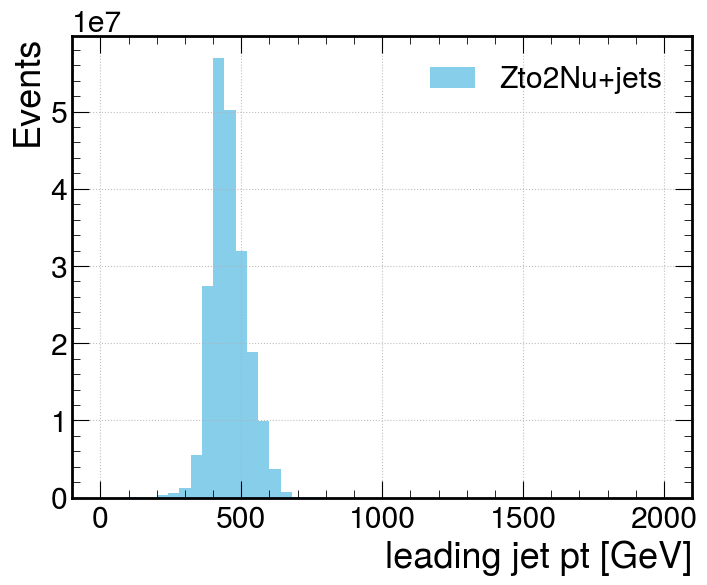

In [33]:
plt.figure(figsize=(8,6))
counts3, bin_edges3,_ = plt.hist(ak.to_numpy(leading_z.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue', weights = weights2)

# Labels and legend
plt.xlabel("leading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [34]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("leading_pt_4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Leading jet pt", len(bin_edges3)-1, bin_edges3)

# Fill the ROOT histogram with the counts
for i in range(len(counts3)):
    hist1.SetBinContent(i+1, counts3[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

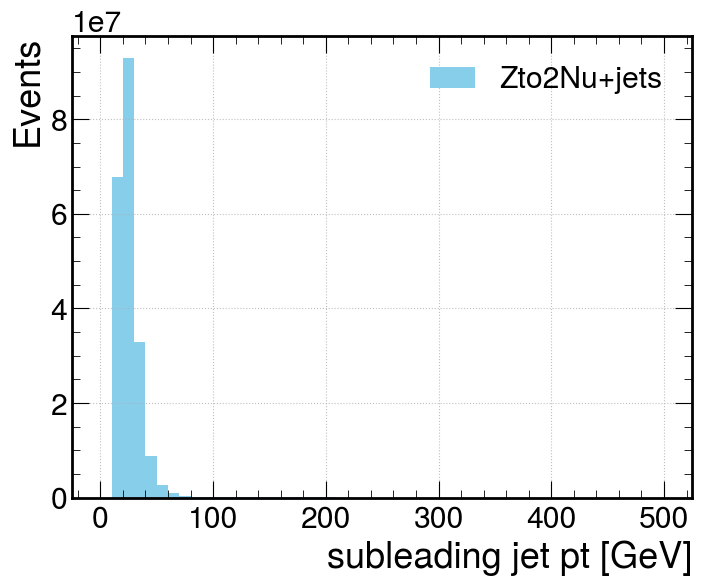

In [35]:
plt.figure(figsize=(8,6))
counts4, bin_edges4,_ = plt.hist(ak.to_numpy(subleading_z.pt), bins=50, range=(0, 500), label="Zto2Nu+jets",color='skyblue', weights = weights2)

# Labels and legend
plt.xlabel("subleading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [36]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("subleading_pt_4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Subleading jet pt", len(bin_edges4)-1, bin_edges4)

# Fill the ROOT histogram with the counts
for i in range(len(counts4)):
    hist1.SetBinContent(i+1, counts4[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

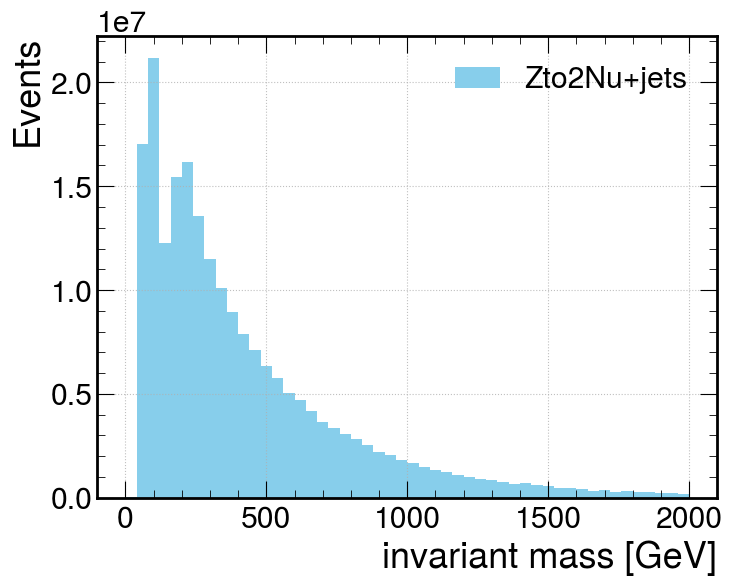

In [37]:
plt.figure(figsize=(8,6))
counts5, bin_edges5,_=plt.hist(ak.to_numpy(dijet_mass_z), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("invariant mass [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [38]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("mass4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Invariant mass", len(bin_edges5)-1, bin_edges5)

# Fill the ROOT histogram with the counts
for i in range(len(counts5)):
    hist1.SetBinContent(i+1, counts5[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

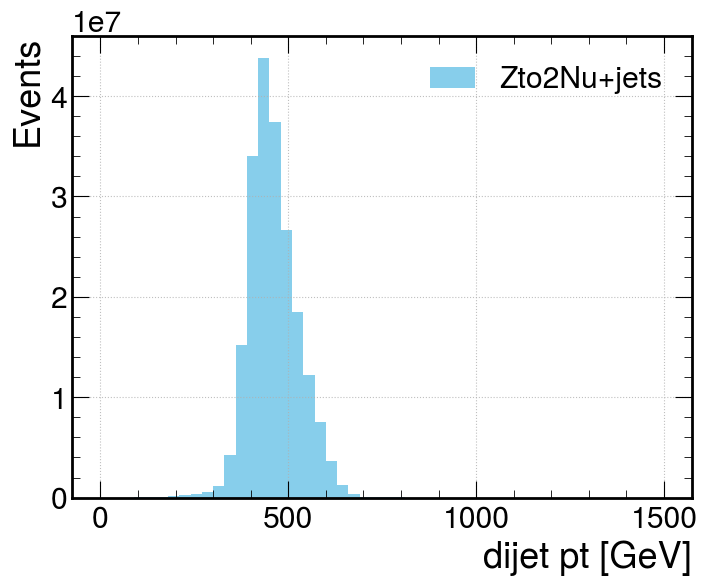

In [39]:
plt.figure(figsize=(8,6))
counts6, bin_edges6,_ = plt.hist(ak.to_numpy(dijet_pt_z), bins=50, range=(0, 1500), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("dijet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [40]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("dijet4.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Dijet pt", len(bin_edges6)-1, bin_edges6)

# Fill the ROOT histogram with the counts
for i in range(len(counts6)):
    hist1.SetBinContent(i+1, counts6[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()